C:\Users\User\AppData\Local\Temp\ipykernel_2628\3568496200.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  indexed_data = target_data.applymap(value_to_index.get)


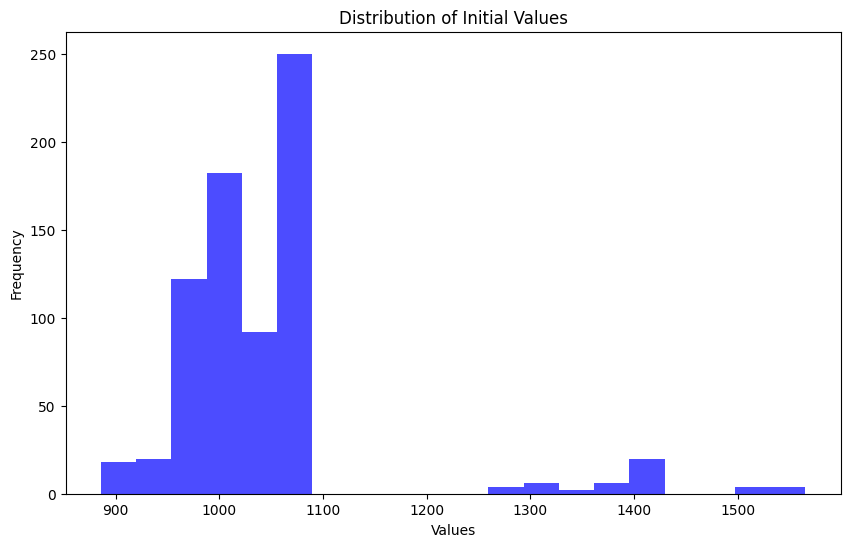

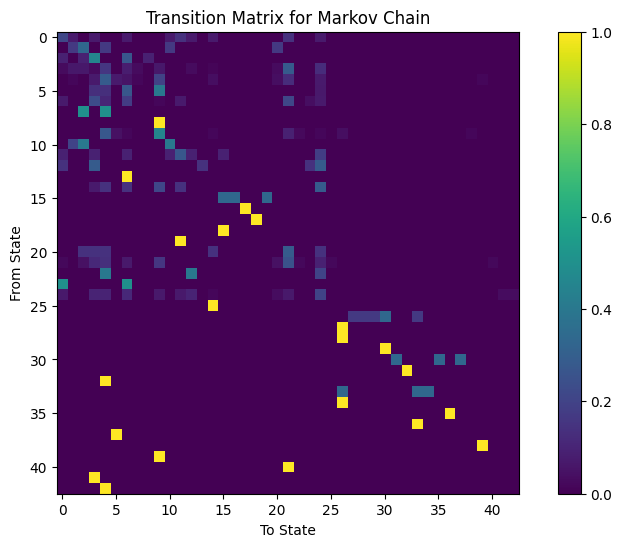

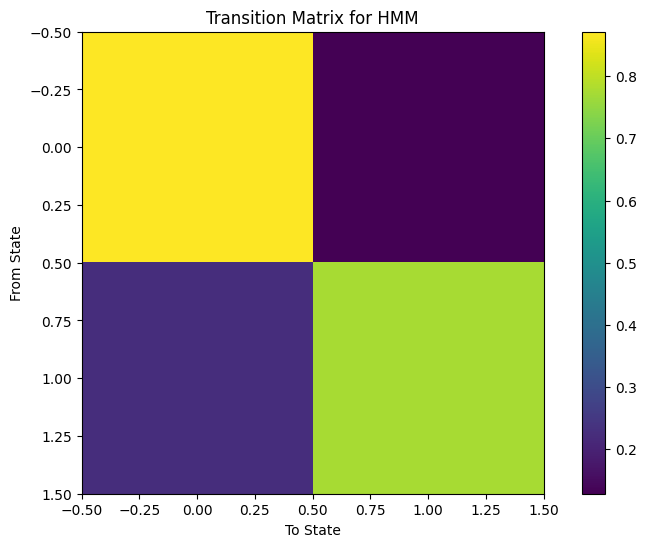

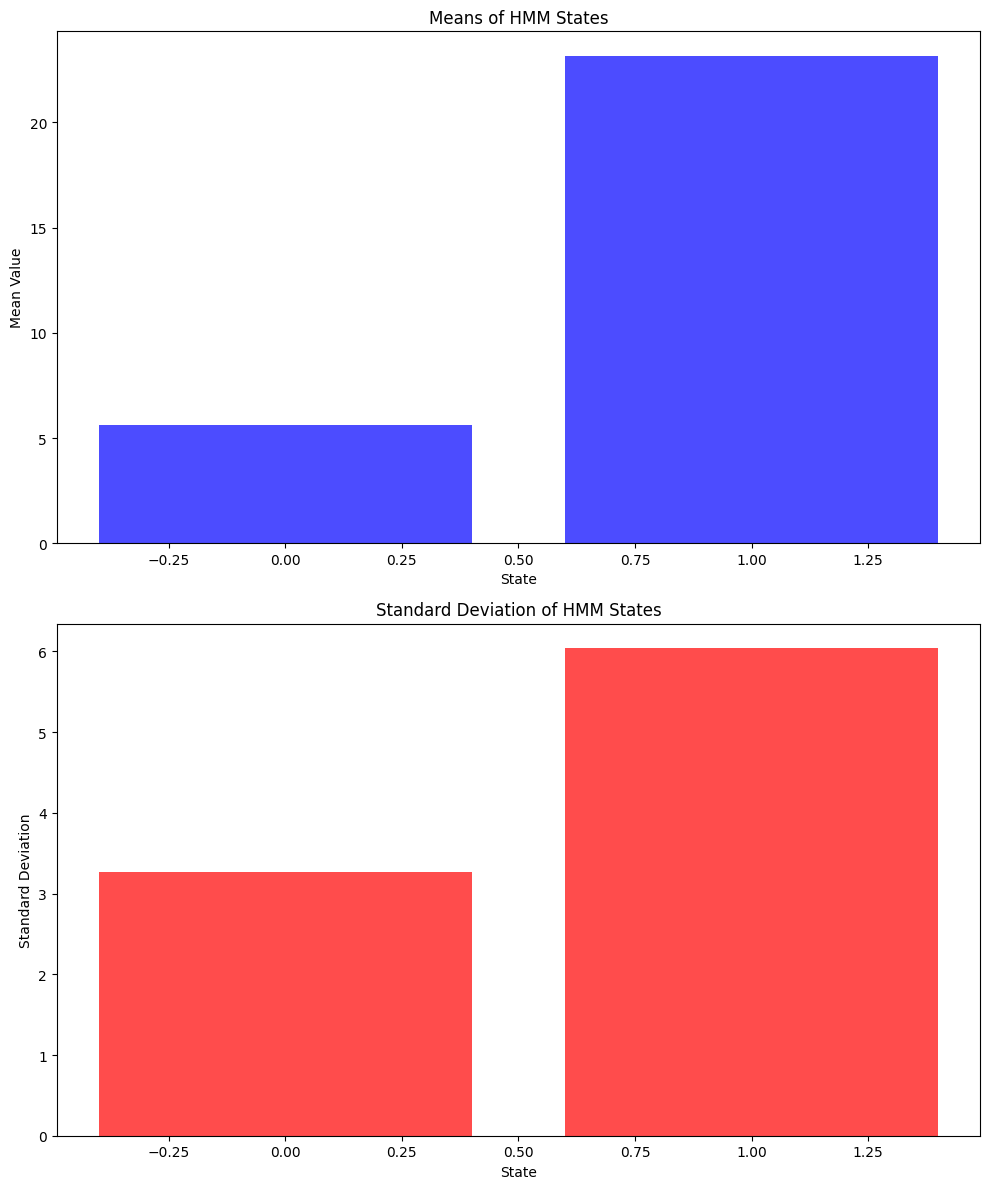

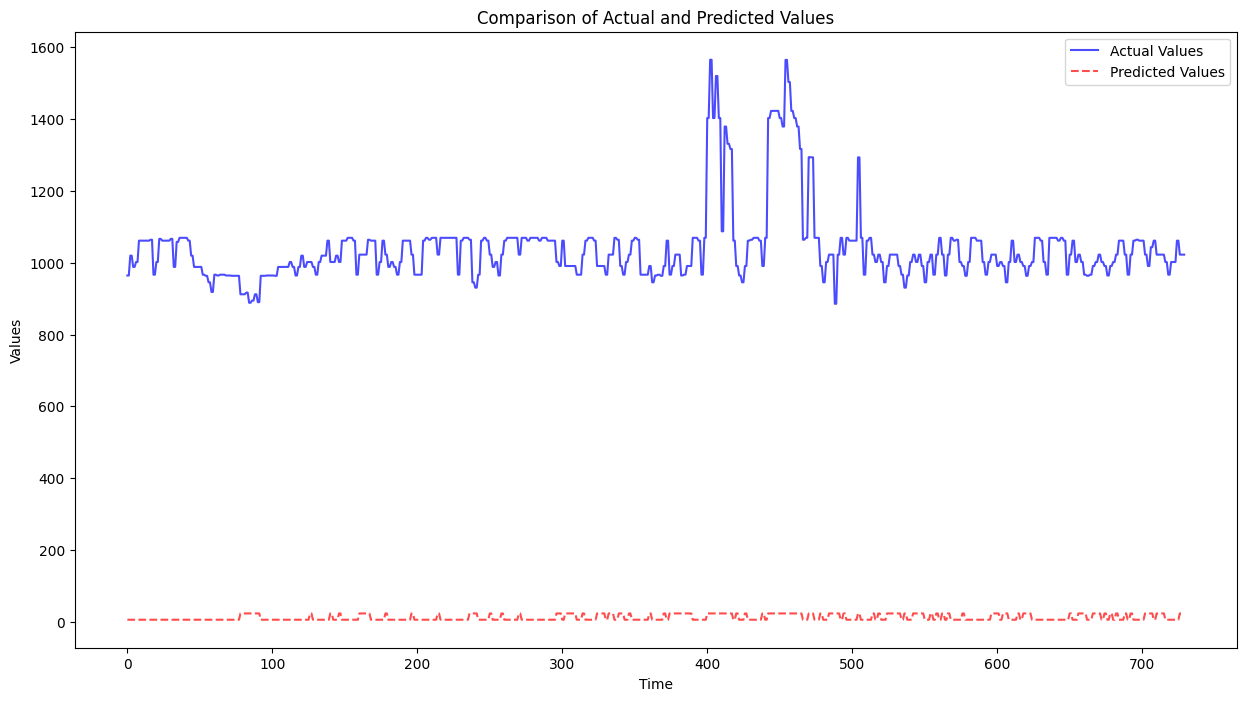

Log-Likelihood: -2351.748291722739
BIC Score: 4749.647895184475
Predicted Mean Value for Next Step: [23.16660002]
Predicted Covariance for Next Step: [[36.48169801]]
Transition matrix
[[0.87134182 0.12865818]
 [0.22642555 0.77357445]]
Means and vars of each hidden state
Hidden state 0
Mean = [5.63178092]
Variance = [10.66300632]
Hidden state 1
Mean = [23.16660002]
Variance = [36.48169801]
Predicted hidden states
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Bước 1: Đọc dữ liệu từ file CSV
file_path = 'Gia SMP.csv'
data = pd.read_csv(file_path)

# Bước 2: Chọn cột 3 và cột 4 làm mục tiêu
target_columns = data.columns[3:5]
target_data = data[target_columns]

# Bước 3: Ánh xạ các giá trị thành các chỉ số nguyên
unique_values = pd.unique(target_data.values.ravel())
value_to_index = {v: i for i, v in enumerate(unique_values)}
index_to_value = {i: v for i, v in enumerate(unique_values)}
indexed_data = target_data.applymap(value_to_index.get)

# Bước 4: Xây dựng ma trận chuyển tiếp cho chuỗi Markov
values = indexed_data.values
num_states = len(unique_values)
transition_matrix = np.zeros((num_states, num_states))

for i in range(len(values) - 1):
    for j in range(len(values[0])):
        transition_matrix[values[i, j], values[i + 1, j]] += 1

transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Bước 5: Xây dựng mô hình HMM
data_hmm = values.reshape(-1, 1)
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model.fit(data_hmm)

# Bước 6: Dự đoán trạng thái ẩn và giá trị tiếp theo
hidden_states = model.predict(data_hmm)

# Lấy trạng thái ẩn cuối cùng
last_hidden_state = hidden_states[-1]

# Tính xác suất chuyển tiếp từ trạng thái ẩn hiện tại sang trạng thái ẩn tiếp theo
next_hidden_state_prob = model.transmat_[last_hidden_state]

# Chọn trạng thái ẩn tiếp theo với xác suất cao nhất
next_hidden_state = np.argmax(next_hidden_state_prob)

# Lấy giá trị dự đoán từ trạng thái ẩn tiếp theo
predicted_value_mean = model.means_[next_hidden_state]
predicted_value_cov = model.covars_[next_hidden_state]

# Dự đoán toàn bộ chuỗi
predicted_hidden_states = model.predict(data_hmm)
predicted_values = model.means_[predicted_hidden_states].flatten()

# Biểu đồ trực quan hóa dữ liệu và kết quả
# Biểu đồ phân phối các giá trị ban đầu
plt.figure(figsize=(10, 6))
plt.hist(target_data.values.ravel(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Initial Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Biểu đồ ma trận chuyển tiếp của chuỗi Markov
plt.figure(figsize=(10, 6))
plt.imshow(transition_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Transition Matrix for Markov Chain')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Biểu đồ ma trận chuyển tiếp của mô hình HMM
plt.figure(figsize=(10, 6))
plt.imshow(model.transmat_, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Transition Matrix for HMM')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Biểu đồ giá trị trung bình và phương sai của các trạng thái trong HMM
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Giá trị trung bình
ax[0].bar(range(model.n_components), model.means_.flatten(), color='blue', alpha=0.7)
ax[0].set_title('Means of HMM States')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Mean Value')

# Phương sai
ax[1].bar(range(model.n_components), np.sqrt(model.covars_.flatten()), color='red', alpha=0.7)
ax[1].set_title('Standard Deviation of HMM States')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(15, 8))
plt.plot(target_data.values.flatten(), label='Actual Values', color='blue', alpha=0.7)
plt.plot(predicted_values, label='Predicted Values', color='red', linestyle='dashed', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Đo lường hiệu suất của mô hình
log_likelihood = model.score(data_hmm)
bic_score = model.bic(data_hmm)
print("Log-Likelihood:", log_likelihood)
print("BIC Score:", bic_score)

# In thông số của dự đoán tiếp theo
print("Predicted Mean Value for Next Step:", predicted_value_mean)
print("Predicted Covariance for Next Step:", predicted_value_cov)
# Print the results
print("Transition matrix")
print(model.transmat_)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print(f"Hidden state {i}")
    print("Mean =", model.means_[i])
    print("Variance =", np.diag(model.covars_[i]))

print("Predicted hidden states")
print(hidden_states)

C:\Users\User\AppData\Local\Temp\ipykernel_2628\3134201816.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  indexed_data = target_data.applymap(value_to_index.get)


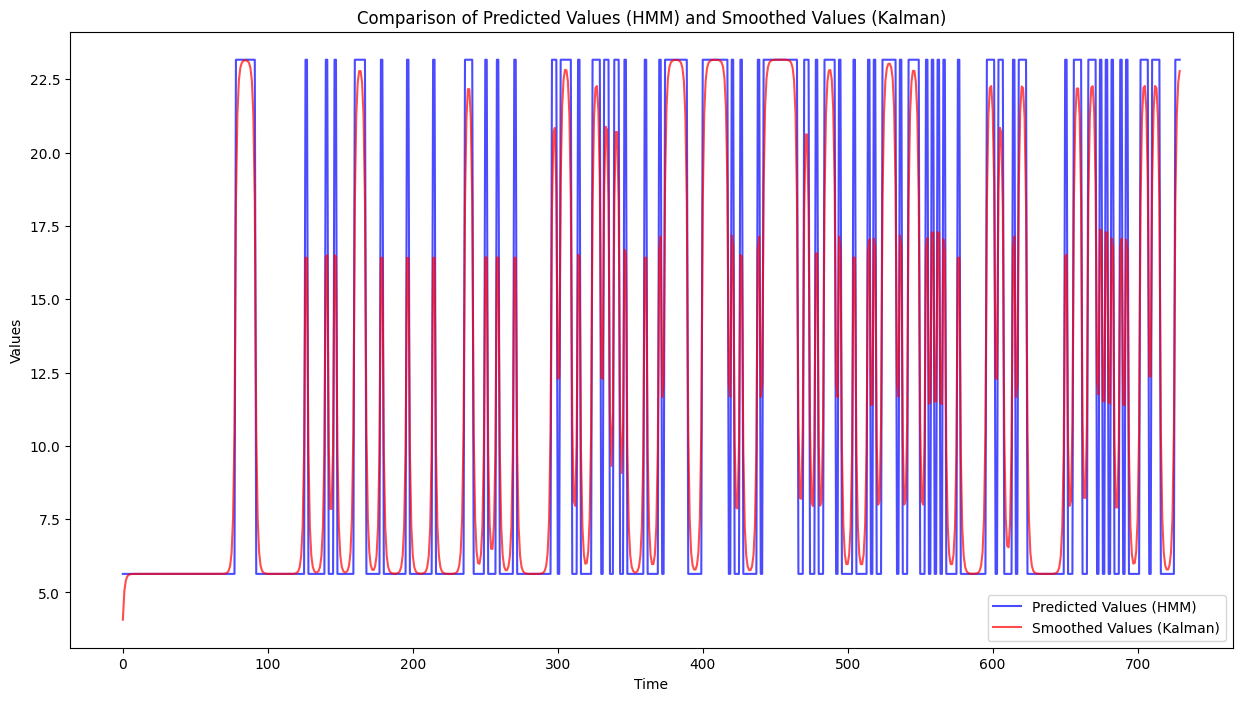

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from pykalman import KalmanFilter

# Bước 1: Đọc dữ liệu từ file CSV
file_path = 'Gia SMP.csv'
data = pd.read_csv(file_path)

# Bước 2: Chọn cột 3 và cột 4 làm mục tiêu
target_columns = data.columns[3:5]
target_data = data[target_columns]

# Bước 3: Ánh xạ các giá trị thành các chỉ số nguyên
unique_values = pd.unique(target_data.values.ravel())
value_to_index = {v: i for i, v in enumerate(unique_values)}
index_to_value = {i: v for i, v in enumerate(unique_values)}
indexed_data = target_data.applymap(value_to_index.get)

# Bước 4: Xây dựng ma trận chuyển tiếp cho chuỗi Markov
values = indexed_data.values
num_states = len(unique_values)
transition_matrix = np.zeros((num_states, num_states))

for i in range(len(values) - 1):
    for j in range(len(values[0])):
        transition_matrix[values[i, j], values[i + 1, j]] += 1

transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Bước 5: Xây dựng mô hình HMM
data_hmm = values.reshape(-1, 1)
model_hmm = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model_hmm.fit(data_hmm)

# Bước 6: Dự đoán trạng thái ẩn và giá trị tiếp theo từ mô hình HMM
hidden_states = model_hmm.predict(data_hmm)
predicted_values_hmm = model_hmm.means_[hidden_states].flatten()

# Bước 7: Kết hợp mô hình HMM với bộ lọc Kalman
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
smoothed_values_kalman = kf.em(predicted_values_hmm).smooth(predicted_values_hmm)[0]

# Biểu đồ so sánh giá trị dự đoán của HMM và giá trị sau khi điều chỉnh bằng Kalman Filter
plt.figure(figsize=(15, 8))
plt.plot(predicted_values_hmm, label='Predicted Values (HMM)', color='blue', alpha=0.7)
plt.plot(smoothed_values_kalman, label='Smoothed Values (Kalman)', color='red', alpha=0.7)
plt.title('Comparison of Predicted Values (HMM) and Smoothed Values (Kalman)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2628\1967462264.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  indexed_data = target_data.applymap(value_to_index.get)


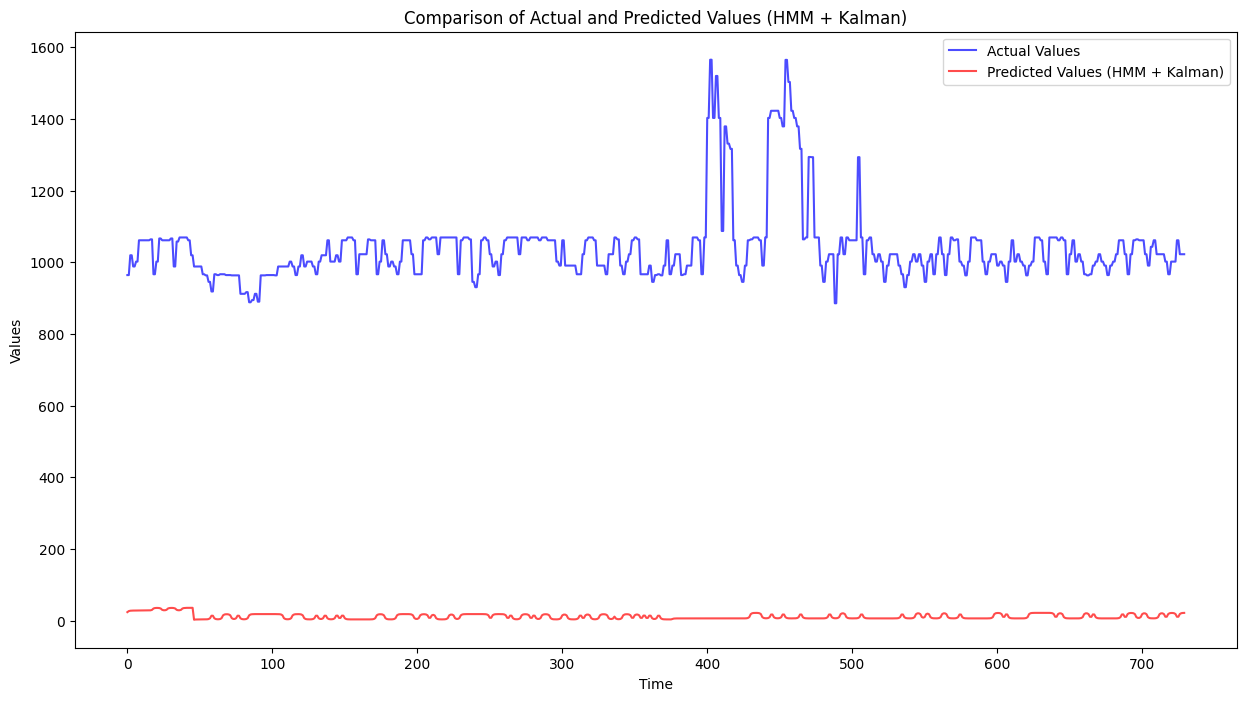

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from pykalman import KalmanFilter
from sklearn.cluster import KMeans

# Bước 1: Đọc dữ liệu từ file CSV
file_path = 'Gia SMP.csv'
data = pd.read_csv(file_path)

# Bước 2: Chọn cột 3 và cột 4 làm mục tiêu
target_columns = data.columns[3:5]
target_data = data[target_columns]

# Bước 3: Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(target_data)

# Bước 4: Ánh xạ các giá trị thành các chỉ số nguyên
unique_values = pd.unique(target_data.values.ravel())
value_to_index = {v: i for i, v in enumerate(unique_values)}
index_to_value = {i: v for i, v in enumerate(unique_values)}
indexed_data = target_data.applymap(value_to_index.get)

# Bước 5: Xây dựng mô hình HMM và dự đoán trạng thái ẩn và giá trị tiếp theo từ mỗi cụm dữ liệu
models_hmm = []
predicted_values_kalman = []

for cluster in range(kmeans.n_clusters):
    cluster_data = indexed_data[cluster_labels == cluster].values
    model_hmm = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
    model_hmm.fit(cluster_data.reshape(-1, 1))
    hidden_states = model_hmm.predict(cluster_data.reshape(-1, 1))
    predicted_values_hmm = model_hmm.means_[hidden_states].flatten()
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    smoothed_values_kalman = kf.em(predicted_values_hmm).smooth(predicted_values_hmm)[0]
    models_hmm.append(model_hmm)
    predicted_values_kalman.extend(smoothed_values_kalman)

# Biểu đồ so sánh giá trị dự đoán sau khi kết hợp cả ba phương pháp
plt.figure(figsize=(15, 8))
plt.plot(target_data.values.flatten(), label='Actual Values', color='blue', alpha=0.7)
plt.plot(predicted_values_kalman, label='Predicted Values (HMM + Kalman)', color='red', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values (HMM + Kalman)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()
